## Mini projet 3 : Mot de passe prononçable + graphique

**prog 1 (principal)** : utilisateur peut choisir de générer un mdp ou tester mdp saisi\
**prog 2 (generateur)** : creer mdp aléatoire (nb mot + longueur choisi + tirets)\
**prog 3 (testeur)** : note /20 pour la force (critère à déterminer)\

In [1]:
from random import randint

def lirefichier(fichier = 'liste_francais.txt', encoding = "UTF-8"):
    # lire un fichier .txt en python
    f = open(fichier, encoding = "ISO-8859-15")
    contenu = f.read() # longue chaine de caractere contenant tout les mot du fichier
    #print(contenu[:21]) # affiche 20 premier caractere du fichier
    #print(contenu[1000:1011]) # affiche 10 caractere entre 1000eme et 1010eme inclus
    contenu = contenu.lower()
    return contenu

def dictionnaire(text):
    i = 0
    nb_total_lettre = len(text)
    alpha = "abcdefghijklmnopqrstuvwxyz"
    #ignore = ["\n", " ", '\x9c', ] # caractere a ignorer
    dico_lettre_possible = {}
    for lettre in text:
        lettre = lettre.lower()
        # fin texte ?
        if(i + 1 == nb_total_lettre):
            break # finit
        # ignore certains caractere
        if(lettre not in alpha or text[i+1].lower() not in alpha):
            i = i+1
            continue # une fois ignorer, go to prochaine lettre

        if (lettre in dico_lettre_possible): # lettre deja dans dico ?
            if (text[i+1].lower() not in dico_lettre_possible[lettre]): # lettre suivante déjà dans sous dico ?
                dico_lettre_possible[lettre].append(text[i+1].lower()) # si oui alors l'ajouter
        else:
            dico_lettre_possible[lettre] = [] # si existe pas deja alors creer une nvll ligne pour la lettre
            dico_lettre_possible[lettre].append(text[i+1].lower()) # + creer et ajouter son sous menu 
        i = i+1
    return dico_lettre_possible


def generateur(nb_mot, longueur):
    contenu = lirefichier('liste_francais.txt', "ISO-8859-15")
    liste_mot_initiale = contenu
    #alpha = "abcdefghijklmnopqrstuvwxyz"
    alpha = "aeiouy"
    dico = dictionnaire(contenu)
    #print(repr(dico).replace("]", "]\n"))
    for m in range(nb_mot):
        cr1 = alpha[randint(0, len(alpha)-1)]
        car_courant = cr1
        mot_courant = cr1
        for l in range(longueur - 1):
            car_courant = dico[car_courant][randint(0, len(dico[car_courant])-1)]
            mot_courant = mot_courant + car_courant
        print(mot_courant)


    return ""
    #return mdp_genere


"""
Function de test de robustesse du mot de passe.
Règles affectant les points:
- longueur : 8> 0pts ; 10>=3pts>=8 ; 5pts>=11
- présence de majuscule et de minuscules : 5pts
- présence de chiffres : 5pts
- présence de caractere speciaux : 5pts (=/= lettres et chiffres)
"""
def testeur(mdp):
    # comment for test
    score_longueur = test_longueur(mdp)
    score_maj = test_majuscule(mdp)
    score_carcsp = test_carcsp(mdp)
    score_chiffre = test_chiffre(mdp)
    note = score_longueur + score_maj + score_carcsp + score_chiffre

    detail_score = "\n\t score_longueur : "+str(score_longueur)
    detail_score = detail_score + "\n\t score_maj : "+str(score_maj)
    detail_score = detail_score + "\n\t score_carcsp : "+str(score_carcsp)
    detail_score = detail_score + "\n\t score_chiffre : "+str(score_chiffre)

    return [note, detail_score]

# longueur
def test_longueur(mdp):
    if len(mdp) <=10 and len(mdp) >=8 :
        return 3
    elif len(mdp) >=11 :
        return 5
    return 0
    
# majuscule
def test_majuscule(mdp):
    a_minuscule = False
    a_majuscule = False
    majuscule = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    for lettre in mdp :
        if lettre in majuscule :
            a_majuscule = True
        if lettre in majuscule.lower() :
            a_minuscule = True
        if a_majuscule == True and a_minuscule == True :
            return 5
    return 0

# caractères spéciaux
def test_carcsp(mdp):
    majuscule = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    for lettre in mdp :
        if lettre not in majuscule and lettre not in majuscule.lower() :
            return 5
    return 0

# chiffres
def test_chiffre(mdp):
    nombre = "0123456789"
    for lettre in mdp :
        if lettre in nombre :
            return 5
    return 0

def principal():
    choix = input("voulez vous générer (1) un mdp ou tester (2) un mdp ? : ")
    if choix == "1":
        nb_mot = input("quelle nombre de mot voulez vous ?")
        longueur = input("quelle longueur de mdp voulez vous ?")
        reponse = "Voici votre mot de passe :" + generateur(nb_mot, longueur)
    elif choix == "2":
        tester = input("saisisser le mdp à tester :")
        res = testeur(tester)
        reponse = "Voici le score de robustesse de mot de passe : " + str(res[0])
        reponse = reponse + "\nDétail du score :" + res[1]

    else :
        reponse = "Merci de répondre par 1 (générer) ou 2 (tester)"
    return reponse
    
#print (principal())

print (generateur(5,8))


iiuenyte
ywhefrir
ioicetrt
avintpel
aknsctaw



In [2]:
code_test = "jhdhzgfzgfyezviyegviuyegviu5454ehj_-----jhfk_"

In [3]:
def nombre_caracteres(code_entree):
    """compte les caractères d'un code"""
    
    alpha = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz-_1234567890"   # lettres possibles
    nb_caracteres = 0
    for caractere in code_entree :
        if caractere in alpha :
            nb_caracteres = nb_caracteres + 1
        else :
            return "erreur"
    return nb_caracteres
    
code_traite = nombre_caracteres(code_test)
print (code_traite)

46


In [4]:
def frequence_caracteres(caractere_visee, code):
    """ fréquence d'apparition d'un caractère dans un code 
    E : caractere_visee, code(str)
    S : frequences (list) listes des fréquences dans l'ordre alpha"""
    frequence = 0
    total = nombre_caracteres(code)
    if total == "erreur":
        return 
    else : 
        nb_caractere_visee = 0
        for caractere in code:
            if caractere == caractere_visee:
                nb_caractere_visee = nb_caractere_visee + 1
        frequence = (nb_caractere_visee / total)*100
        return round(frequence, 3)

valeur_f = frequence_caracteres("1", code_test)
print(valeur_f)

0.0


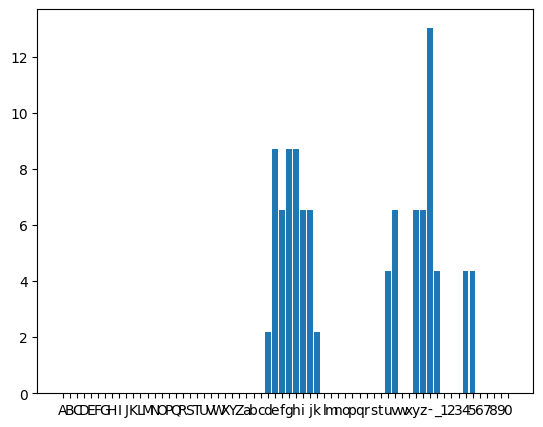

In [5]:
import matplotlib.pyplot as plt

# caractères possibles
alpha = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz-_1234567890"  
frequences = [0 for i in range(64)]
longueur = list(alpha)

# fréquences observées des chaque caracteres de alpha
for i in range(len(longueur)):
    f = frequence_caracteres(longueur[i], code_test)
    frequences[i] = f

# Tracé du graphique
plt.bar(longueur, frequences)
plt. gcf(). subplots_adjust(left = 0.125, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.2) 
plt.show()

In [6]:
contenu = lirefichier('liste_francais.txt', "ISO-8859-15")
print(dictionnaire(contenu))

{'a': ['a', 'r', 'b', 'i', 'n', 's', 't', 'g', 'l', 'y', 'm', 'c', 'd', 'j', 'p', 'u', 'f', 'v', 'h', 'x', 'k', 'z', 'q', 'o', 'e', 'w'], 'r': ['o', 'd', 'e', 'r', 'a', 'i', 't', 'u', 'b', 'p', 'n', 's', 'm', 'c', 'y', 'g', 'h', 'v', 'q', 'k', 'l', 'f', 'w', 'j', 'x', 'z'], 'o': ['n', 'u', 'i', 'm', 'r', 'l', 'y', 't', 'g', 'd', 's', 'c', 'p', 'b', 'a', 'o', 'v', 'f', 'x', 'k', 'q', 'z', 'e', 'w', 'h', 'j'], 'b': ['a', 'b', 'e', 'c', 'd', 'h', 'i', 'j', 'l', 'o', 'r', 's', 'u', 'y', 'm', 'n', 'p', 'v', 't', 'w'], 'i': ['s', 'e', 'r', 'a', 'c', 'o', 'q', 'n', 'l', 'd', 't', 'g', 'f', 'v', 'b', 'm', 'p', 'x', 'u', 'h', 'z', 'j', 'k', 'i', 'w'], 's': ['s', 'e', 'i', 'o', 'm', 't', 'u', 'a', 'c', 'p', 'n', 'q', 'b', 'y', 'h', 'k', 'f', 'l', 'j', 'g', 'd', 'z', 'r', 'v', 'w'], 'e': ['m', 'n', 'r', 's', 'u', 'l', 'i', 'c', 'p', 't', 'v', 'a', 'd', 'f', 'x', 'g', 'z', 'y', 'h', 'o', 'e', 'k', 'b', 'j', 'w', 'q'], 'm': ['e', 'i', 'm', 'a', 'o', 'p', 'u', 's', 'b', 'n', 'g', 'w', 't', 'l', 'r',